In [2]:
import pandas as pd
import numpy as np

# illuminahiseq & illuminaga 데이터 불러오기
a = illuminahiseq
b = illuminaga

In [4]:
a = pd.read_table('/hdd/Correlation_Disance/mRNAseq_colon_cancer/illuminahiseq_Level_3__RSEM_genes_normalized__data.Level_3.2016012800.0.0/COAD.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

In [ ]:
b = pd.read_table("/hdd/Correlation_Disance/mRNAseq_colon_cancer/illuminaga_Level_3_RSEM_genes_normalized_data.2016012800.0.0/COAD.rnaseqv2__illuminaga_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt")

# 행렬 치환

In [5]:
c = a.transpose()

# 행렬 치환 후, 첫 행을 컬럼명으로 삽입

## 첫 행을 컬럼명으로 삽입 후, 실제 첫 행을 삭제

In [6]:
c.columns = c.iloc[0]

In [7]:
c = c.drop(c.columns[[0]], axis = 1)

# 인덱스 열을 삭제하고 초기화

In [9]:
c.reset_index(drop = True, inplace = True)

In [10]:
c.head()

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
1,0.5174,18.0851,15.7640,144.4004,774.6615,0.0000,441.9729,1.9342,0.0000,0.0000,...,71.0832,461.315,1105.42,3.3849,543.037,6259.19,1358.32,798.356,13.0561,0
2,0.0000,4.4315,4.2767,142.6609,1185.2927,0.0000,522.0126,0.4838,0.0000,0.0000,...,39.671,366.715,1149.49,0.4838,290.76,4653.12,1220.13,333.817,1.9352,0.9676
3,0.0000,9.8995,11.3032,143.1987,888.3202,0.0000,288.0643,2.9245,0.0000,0.0000,...,31.4385,349.479,1083.53,0,669.713,4460.61,3002.01,530.068,2.1934,0
4,0.0000,7.9174,18.7608,146.1876,1280.5508,0.0000,379.5181,2.1515,0.0000,0.0000,...,54.6472,542.169,1374.35,0.4303,445.353,4190.19,1093.37,574.441,6.4544,0.4303


In [11]:
c = c.drop([0])

# 알 수 없는 컬럼 제거

In [12]:
test = [col for col in c if col.startswith('?')]

In [13]:
test2 = c

In [14]:
for i in test :
    test2 = test2.drop([i], axis = 1)

In [15]:
cor_matrix = test2.corr()

""


# 히트맵 source_code

In [ ]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [ ]:
correlation_matrix(df)

# 거리간 상관관계 데이터 작성

## 상관관계 데이터는 R에서 작성함(Distance_Analysis_ver1.R 파일 참조할 것)

In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
a = pd.read_table("/hdd/Correlation_Disance/chr01_distance_flag.csv", sep = ',')

In [ ]:
x = pd.read_table("/hdd/Correlation_Disance/corr_stack.csv", sep = ',')

In [ ]:
import multiprocessing as mp

In [ ]:
x = pd.DataFrame(x)

In [6]:
x.columns = ['from', 'to', 'corr']

In [7]:
x.head()

,from,to,corr
0,A1BG,A1BG,1.000000
1,A1BG,A1CF,0.036835
2,A1BG,A2BP1,0.289180
3,A1BG,A2LD1,0.021131
4,A1BG,A2ML1,-0.012454


In [9]:
a = dd.from_pandas(a, npartitions = 1)
x = dd.from_pandas(x, npartitions = 5)

In [8]:
new_df = dd.merge(a, x, how = 'inner', on = ['from', 'to'])

In [9]:
new_df.head()

,from,to,distance,flag,corr
0,OR4F29,OR4F5,380731.0,HH,0.027622
1,OR4F29,SAMD11,474062.0,TT,-0.026784
2,OR4F29,KLHL17,508424.0,TT,0.131410
3,OR4F29,PLEKHN1,514141.0,TT,0.015706
4,OR4F29,ISG15,561788.0,TT,-0.089181


In [11]:
def mask(df, key, value):
    return df[df[key] == value]

In [23]:
new_df['flag'] = new_df['flag'].astype('str')
new_df['from'] = new_df['from'].astype('str')
new_df['to'] = new_df['to'].astype('str')

In [33]:
new_df.count()

from        846256
to          846256
distance    846256
flag        846256
corr        846256
dtype: int64

In [48]:
dis1k_df = new_df[new_df['distance'] < 1000]
dis1k_df = dis1k_df[dis1k_df['distance'] > -1000]

In [49]:
dis1k_df['flag'].unique()

array(['HH', 'TT'], dtype=object)

In [50]:
HH = dis1k_df[dis1k_df['flag'] == 'HH']
TT = dis1k_df[dis1k_df['flag'] == 'TT']
minus_in_plus = dis1k_df[dis1k_df['flag'] == 'minus_in_plus']
HH_fold = dis1k_df[dis1k_df['flag'] == 'HH_fold']

In [51]:
HH.count()

from        82
to          82
distance    82
flag        82
corr        82
dtype: int64

In [52]:
TT.count()

from        94
to          94
distance    94
flag        94
corr        94
dtype: int64

In [53]:
minus_in_plus.count()

from        0
to          0
distance    0
flag        0
corr        0
dtype: int64

In [54]:
HH_fold.count()

from        0
to          0
distance    0
flag        0
corr        0
dtype: int64

In [119]:
list_loc_corr.to_csv('/hdd/Correlation_Disance/corr_result/01_result_summary.csv', sep = ',', header = True)

In [55]:
HH_filter = HH[(HH['corr'] >= 0.3) | (HH['corr'] <= -0.3 )]

In [56]:
HH_filter.count()

from        26
to          26
distance    26
flag        26
corr        26
dtype: int64

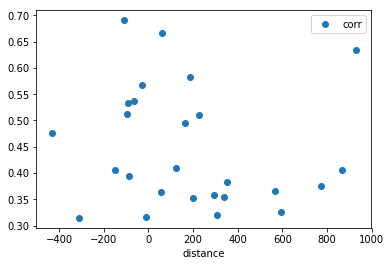

In [57]:
%matplotlib inline
HH_filter.plot(x='distance', y='corr', style = 'o')

In [45]:
HH_filter.head()

,from,to,distance,flag,corr
11192,ACAP3,SCNN1D,354.0,HH,0.382684
12125,CPSF3L,PUSL1,-93.0,HH,0.533340
16787,MRPL20,LOC148413,-151.0,HH,0.405977
24252,TMEM52,CALML6,295.0,HH,0.358133
63443,MAD2L2,FBXO6,125.0,HH,0.410082
